In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model


In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
y_train = np.atleast_2d(y_train.T)      # 2d saves headache when multiplying
y_train[y_train>=5] = 1               # binary encoding
y_train[y_train<5] = 0

X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.
y_test = np.atleast_2d(y_test.T)        # 2d saves headache when multiplying
y_test[y_test>=5] = 1                 # binary encoding
y_test[y_test<5] = 0

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
print("Label Matrix Shape:", y_train.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)
Label Matrix Shape: (60000, 1)


In [ ]:
# Constants and initialization
B = 32      # batch size
T = 100     # number of epochs
eta = 0.0001 # placeholder
losses = np.zeros((T,1)) # loss for epoch t
w = np.random.normal(0,1.5,size = [784,1])
idx = np.arange(60000)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def lossFn(x,w,y):
  prod = x@w
  prod = np.clip(prod,0,1)
  return (y.T)@np.log(1+np.exp(-prod)) +(1-y).T@prod

In [ ]:
for t in range(T):
  #first, select the batch for this iteration:
  batchIdx = np.random.choice(X_train.shape[0],size = X_train.shape[0],replace=False)
  print(f'Epoch ={t}')
  epochLoss = 0
  for b in range(batchIdx.shape[0]):
    thisBatch = batchIdx[b*B:(b+1)*B]
    X_batch = X_train[thisBatch]
    y_batch = y_train[thisBatch]
    # gradient of loss function w.r.t w
    gradL = X_batch.T@(1+y_batch*sigmoid(X_batch@w)-2*y_batch)
    w = w-eta*gradL #update rule
    epochLoss += lossFn(X_batch,w,y_batch)
  losses[t] = epochLoss/X_train.shape[0] #avg loss/sample

Epoch =0
Epoch =1
Epoch =2
Epoch =3
Epoch =4
Epoch =5
Epoch =6
Epoch =7
Epoch =8
Epoch =9
Epoch =10
Epoch =11
Epoch =12
Epoch =13
Epoch =14
Epoch =15
Epoch =16
Epoch =17
Epoch =18
Epoch =19
Epoch =20
Epoch =21
Epoch =22
Epoch =23
Epoch =24
Epoch =25
Epoch =26
Epoch =27
Epoch =28
Epoch =29
Epoch =30
Epoch =31
Epoch =32
Epoch =33
Epoch =34
Epoch =35
Epoch =36
Epoch =37
Epoch =38
Epoch =39
Epoch =40
Epoch =41
Epoch =42
Epoch =43
Epoch =44
Epoch =45
Epoch =46
Epoch =47
Epoch =48
Epoch =49
Epoch =50
Epoch =51
Epoch =52
Epoch =53
Epoch =54
Epoch =55
Epoch =56
Epoch =57
Epoch =58
Epoch =59
Epoch =60
Epoch =61
Epoch =62
Epoch =63
Epoch =64
Epoch =65
Epoch =66
Epoch =67
Epoch =68
Epoch =69
Epoch =70
Epoch =71
Epoch =72
Epoch =73
Epoch =74
Epoch =75
Epoch =76
Epoch =77
Epoch =78
Epoch =79
Epoch =80
Epoch =81
Epoch =82
Epoch =83
Epoch =84
Epoch =85
Epoch =86
Epoch =87
Epoch =88
Epoch =89
Epoch =90
Epoch =91
Epoch =92
Epoch =93
Epoch =94
Epoch =95
Epoch =96
Epoch =97
Epoch =98
Epoch =99


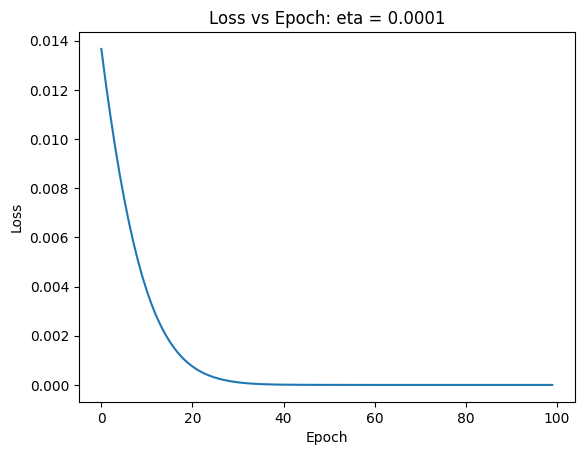

In [ ]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Loss vs Epoch: eta = {eta}')
plt.show()

In [ ]:
pred = sigmoid(X_test @ w)
pred_labels = (pred >=0.5).astype(int)
accuracy = np.mean(pred_labels == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0
